In [1]:
import yfinance as yf
from pandas import MultiIndex, Int16Dtype
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from scipy.ndimage import shift
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings

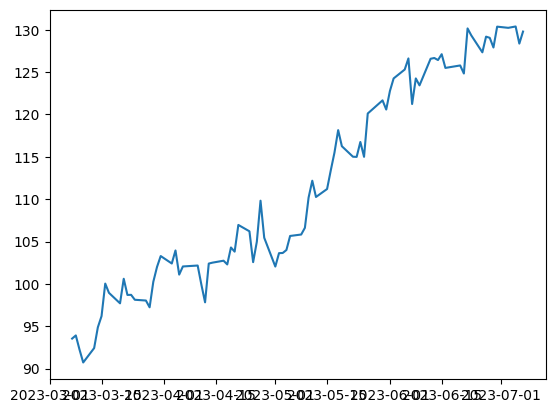

Standard Deviation: 1.922390975719085
(-10.860357656221673, 1.4516726229590084e-19, 0, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, 200.49314977323093)
Shape: (84,)


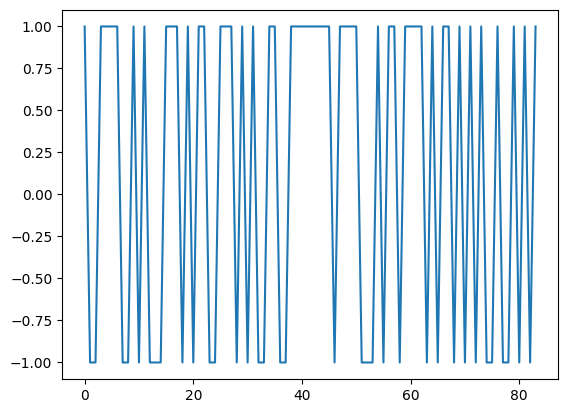

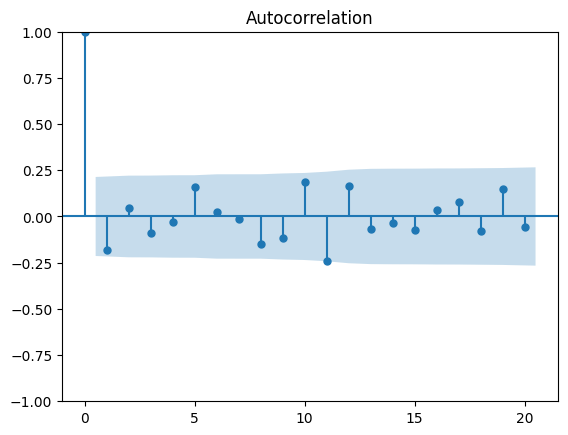

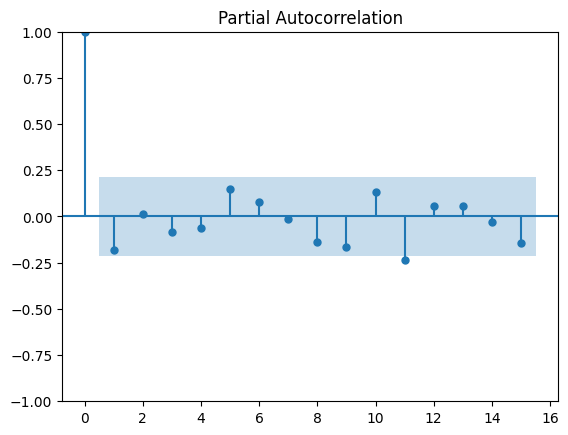

(84,)


In [17]:
tickerSymbol = 'AMZN'
data = yf.Ticker(tickerSymbol)
dftrain = data.history(period = "3mo",interval="1d",start = "2023-03-07", end = "2023-07-10")
raw_prices = dftrain["Close"].dropna().to_numpy()
returns = dftrain["Close"].pct_change().dropna().to_numpy()
prices = dftrain["Close"]
for i in range(returns.shape[0]):
    returns[i] = returns[i]*100
plt.plot(prices)
plt.show()
print(f"Standard Deviation: {np.std(returns)}")
for i in range(returns.shape[0]):
    if returns[i]>0:
        returns[i] = 1
    elif returns[i]<0:
        returns[i] = -1
    else:
        returns[i] = 0
print(sm.tsa.adfuller(returns))
plt.plot(returns)
print(f"Shape: {returns.shape}")
plot_acf(returns)
plt.show()
plot_pacf(returns,lags=15)
plt.show()
print(returns.shape)

In [36]:
np.corrcoef()

NameError: name 'df_pivot' is not defined

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:                 ARIMA(6, 0, 6)   Log Likelihood                -107.279
Date:                Tue, 12 Sep 2023   AIC                            242.558
Time:                        14:23:58   BIC                            275.907
Sample:                             0   HQIC                           255.929
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1784      0.158      1.132      0.258      -0.131       0.487
ar.L1         -1.1268      7.297     -0.154      0.877     -15.428      13.175
ar.L2         -0.3048     12.390     -0.025      0.9

/Users/hamza/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


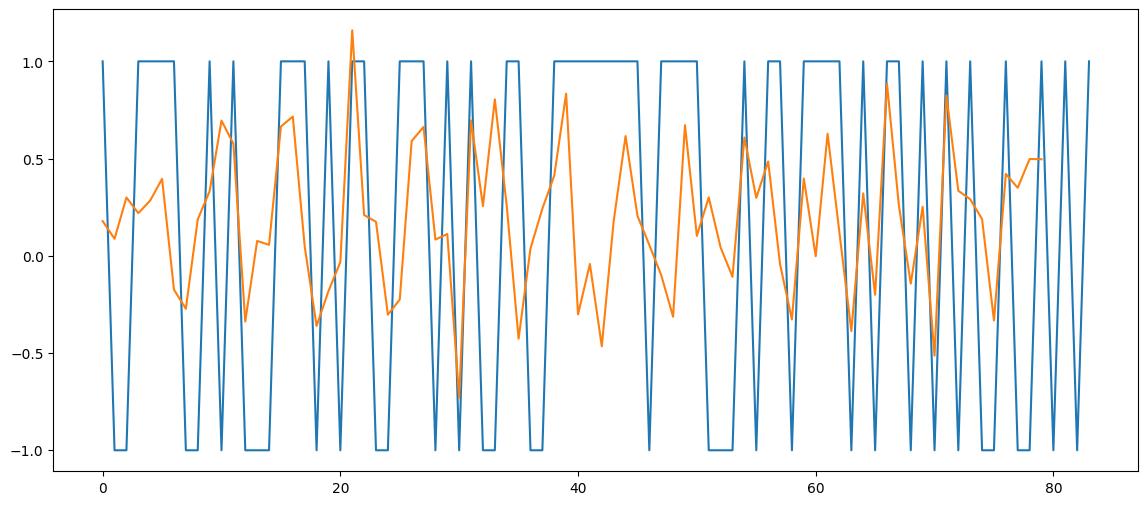

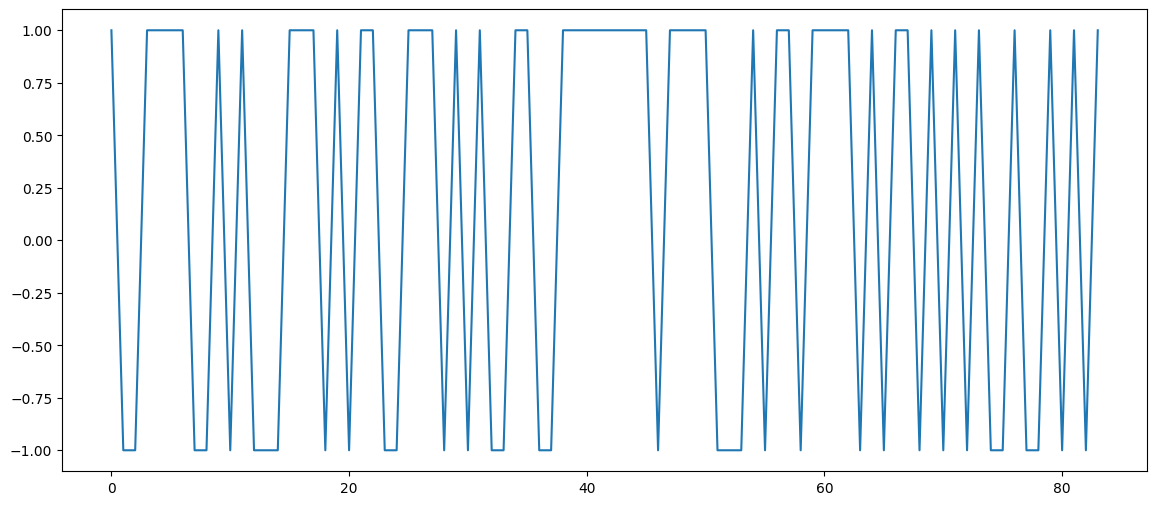

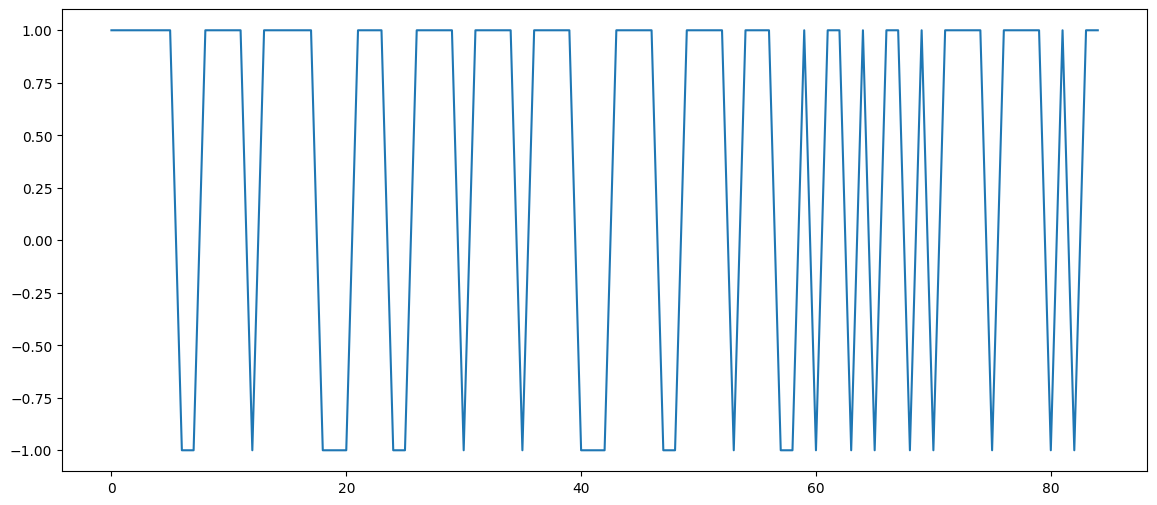

In [12]:
arma_mod = sm.tsa.ARIMA(returns[0:80], order=(6,0,6))
results = arma_mod.fit()
print(results.summary())
forecast = results.predict(start = 0, end = 84)

for i in range(forecast.shape[0]):
    if forecast[i]>0:
        forecast[i] = 1
    elif forecast[i]<0:
        forecast[i] = -1
    else:
        forecast[i] = 0
figure(figsize=(14, 6))
plt.plot(returns)
plt.plot(results.fittedvalues)
figure(figsize=(14, 6))
plt.plot(returns)
figure(figsize=(14, 6))
plt.plot(forecast)


In [13]:
evaluation = []
print(forecast.shape)
for i in range(forecast.shape[0]-1):
    if forecast[i] == returns[i]:
        evaluation.append(f"Observation: {i} Correct")
    else:
        evaluation.append(f"Observation: {i} InCorrect")
print(evaluation)

(85,)
['Observation: 0 Correct', 'Observation: 1 InCorrect', 'Observation: 2 InCorrect', 'Observation: 3 Correct', 'Observation: 4 Correct', 'Observation: 5 Correct', 'Observation: 6 InCorrect', 'Observation: 7 Correct', 'Observation: 8 InCorrect', 'Observation: 9 Correct', 'Observation: 10 InCorrect', 'Observation: 11 Correct', 'Observation: 12 Correct', 'Observation: 13 InCorrect', 'Observation: 14 InCorrect', 'Observation: 15 Correct', 'Observation: 16 Correct', 'Observation: 17 Correct', 'Observation: 18 Correct', 'Observation: 19 InCorrect', 'Observation: 20 Correct', 'Observation: 21 Correct', 'Observation: 22 Correct', 'Observation: 23 InCorrect', 'Observation: 24 Correct', 'Observation: 25 InCorrect', 'Observation: 26 Correct', 'Observation: 27 Correct', 'Observation: 28 InCorrect', 'Observation: 29 Correct', 'Observation: 30 Correct', 'Observation: 31 Correct', 'Observation: 32 InCorrect', 'Observation: 33 InCorrect', 'Observation: 34 Correct', 'Observation: 35 InCorrect', 'Ob

In [15]:
print(returns[87:91])

[]


In [14]:
results.predict(start = 87, end = 94)

array([-0.16131889,  0.27109781,  0.6465326 , -0.07713647,  0.41883862,
       -0.3405169 ,  0.21446773,  0.46046717])